## Vizualising CV results

Now that we have run our CV experiments, it's time to have a look at the results

[0.92063281 0.90643928 0.95986494 1.02559003 1.01033485]
[2.00459314 1.99085279 2.09868244 1.9693396  2.05328773]
[3.03151121 2.97291068 2.91732888 2.93477739 3.03663804]


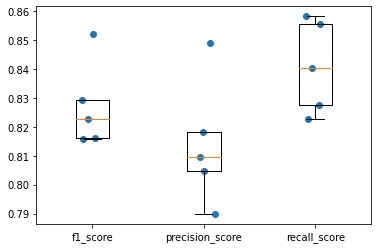

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

results = pd.read_json("cv_data/INCLUDE/outer_results_5_splits.json")

fig, ax = plt.subplots()

for i, metric in enumerate(results.columns):
    jitter = np.random.random(size=results.shape[0])*0.2 + i+0.9
    print(jitter)
    ax.scatter(jitter, results[metric], color="C0")
    
ax.boxplot(results, showfliers=False)
ax.set_xticklabels(results.columns)
plt.show()


In [34]:
results

,f1_score_micro,f1_score_macro,f1_score_weighted,f1_score_0,f1_score_1,f1_score_2,f1_score_3,f1_score_4,precision_score_micro,precision_score_macro,...,precision_score_3,precision_score_4,recall_score_micro,recall_score_macro,recall_score_weighted,recall_score_0,recall_score_1,recall_score_2,recall_score_3,recall_score_4
0,0.716981,0.700708,0.712370,0.500000,0.814815,0.875,0.666667,0.647059,0.863636,0.896503,...,0.636364,0.846154,0.612903,0.604484,0.612903,0.333333,0.687500,0.777778,0.700000,0.523810
1,0.788991,0.789368,0.789247,0.800000,0.869565,0.750,0.800000,0.727273,0.934783,0.921429,...,1.000000,0.857143,0.682540,0.696829,0.682540,0.666667,0.769231,0.750000,0.666667,0.631579
2,0.735043,0.724594,0.723764,0.470588,0.916667,0.750,0.800000,0.685714,0.811321,0.847179,...,0.769231,0.666667,0.671875,0.663741,0.671875,0.333333,0.846154,0.600000,0.833333,0.705882
3,0.730769,0.727500,0.729236,0.666667,0.700000,0.750,0.833333,0.687500,0.863636,0.903485,...,0.909091,0.733333,0.633333,0.619925,0.633333,0.500000,0.583333,0.600000,0.769231,0.647059
4,0.846154,0.728547,0.836163,0.500000,0.888889,0.500,0.933333,0.820513,0.956522,0.977778,...,1.000000,0.888889,0.758621,0.620714,0.758621,0.333333,0.800000,0.333333,0.875000,0.761905


[Text(1, 0, 'Micro average'),
 Text(2, 0, 'Macro average'),
 Text(3, 0, 'Coastal and marine Ecosystems'),
 Text(4, 0, 'Human and managed systems'),
 Text(5, 0, 'Mountains, snow and ice'),
 Text(6, 0, 'Rivers, lakes, and soil moisture'),
 Text(7, 0, 'Terrestrial ES')]

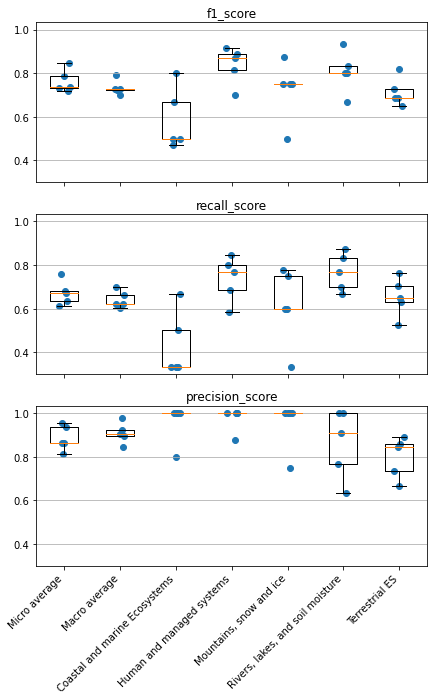

In [52]:
# For the multilabel results we can show performance for each class
results = pd.read_json("cv_data/12/outer_results_5_splits.json")
impact_labels = [
    "Coastal and marine Ecosystems",
    "Human and managed systems",
    "Mountains, snow and ice",
    "Rivers, lakes, and soil moisture",
    "Terrestrial ES"
]
impact_indices = [x for x in range(len(impact_labels))]

fig, axs = plt.subplots(3, figsize=(7,10), sharex=True, sharey=True)

metrics = ["f1_score", "recall_score", "precision_score"]
for i, metric in enumerate(metrics):
    ax = axs[i]
    ax.set_title(metric)
    metric_labels = [f"{metric}_{x}" for x in ["micro", "macro"] + impact_indices]
    for j, col in enumerate(metric_labels):
        jitter = np.random.random(size=results.shape[0])*0.2 + j+0.9
        ax.scatter(jitter, results[col], color="C0")    
        
    ax.boxplot([results[col] for col in metric_labels], showfliers=False)
    ax.grid(axis="y")
    
impact_labels = ["Micro average", "Macro average"] + impact_labels
ax.set_xticks(range(1,len(impact_labels)+1))
ax.set_xticklabels(impact_labels, rotation=45, ha="right")